# Exercise recommander with flashcards

## August 2019 - Nicolas Dupuy

***

Flashcards are well-known revision tools for students used well before the arrival of smartphones. However recent apps made learning easier by allowing anybody to manage large amount of flashcards on their mobile, and so have them anywhere and anytime. Lot of useful options come with those apps, such as frequency management of individual cards, or reminders. <br>

We propose in this work to develop a new option making learning more efficient. Modern smartphones' artificial intelligence are getting more and more efficient, allowing us to develop learning aptitudes to flashcards app. The one we will focus on will be the aptitude to find correlations between cards.

__Let us begin with some examples :__

Imagine a set of 5 cards with correlated exercises of increasing difficulty A>B>C>D>E . Multiple users use this set of cards.<br>
The app does not have prior information about those correlations, however it has to figure them out by itself by noticing that users have in average more difficulty to answer correctly to C than to A and B. The app thus can adapt each card apparition frequency according to the user level, estimated with its past history.

This will be even more useful with large set, so if different cards cover the same topic and have the same difficulty, the app could focus on this subset of cards when it think that the user should work on this one to improve its level.

__Problematic :__
It would be sufficient to use only one single user data. A large amount of data is required to find patterns among cards. So the different account should be able to share information. <br>
This leads us to privacy questions: how to insure and preserve any user privacy?

__Project:__
To tackle this task, we will set up a federated learning protocol allowing the data to be processed on the users' machine. Only information about new estimated correlation about cards will be shared publicly.

First, define a dictionnary for our prototype of card set:

## 0. Set up a virtual environment 

We define a cards-user couple which makes our environment for a reinforcement learning algorithm

In [376]:
# Dictionary of cards with different levels of difficulty (A = easy < B < C < D < E = hard)
# Dependencies are then randomly generated

import numpy as np

list_of_cards = []
dict_of_cards = {}

for i in range(10):
    list_of_cards.append('A' + str(i))
    list_of_cards.append('B' + str(i))
    list_of_cards.append('C' + str(i))
    list_of_cards.append('D' + str(i))
    list_of_cards.append('E' + str(i))

list_of_cards = np.sort(list_of_cards)

for i in list_of_cards:
    if i[0] == 'A':
        diff = 1
    if i[0] == 'B':
        diff = 2
    if i[0] == 'C':
        diff = 3
    if i[0] == 'D':
        diff = 4
    if i[0] == 'E':
        diff = 5
    diff *= 3 * (np.random.rand() + 1) 
    dict_of_cards[i] = {'diff':diff } 

In [377]:
# Dependencies are then introduced :
# An integers measures the increase in chances to solve the card if
# the one specified has been seen before

for j in range(50):

    for n, i in enumerate( list_of_cards ):
        N = len(list_of_cards)
        k = np.random.randint(0 ,N )
        if list_of_cards[k] != i:
            bonus = ((np.power(n,2)/10) * np.random.rand()/(k+1))
            if bonus > 1 :
                if list_of_cards[k] in dict_of_cards[i]:
                    dict_of_cards[i][list_of_cards[k]] += int(bonus)
                else:
                    dict_of_cards[i][list_of_cards[k]] = int(bonus)

In [378]:
dict_of_cards

{'A0': {'diff': 5.270490301265181},
 'A1': {'diff': 4.170235415975936},
 'A2': {'diff': 3.1229301491982357},
 'A3': {'diff': 5.245287619922594},
 'A4': {'diff': 5.309465701795416},
 'A5': {'A0': 3, 'diff': 3.6571212392180192},
 'A6': {'A2': 1, 'diff': 3.9268510634533174},
 'A7': {'A1': 2, 'A3': 1, 'diff': 3.57100859006526},
 'A8': {'A2': 2, 'diff': 4.152518822025841},
 'A9': {'A0': 5, 'A2': 1, 'diff': 5.089021111841077},
 'B0': {'A5': 1, 'A6': 1, 'diff': 11.172802550119535},
 'B1': {'A1': 7,
  'A2': 1,
  'A3': 2,
  'A4': 1,
  'A9': 2,
  'diff': 11.103559259024482},
 'B2': {'A0': 10,
  'A2': 3,
  'A3': 2,
  'A4': 3,
  'A5': 2,
  'diff': 8.170745904596695},
 'B3': {'A0': 10,
  'A1': 7,
  'A3': 4,
  'A4': 2,
  'A6': 2,
  'A7': 1,
  'A8': 1,
  'B2': 1,
  'diff': 10.125862488913803},
 'B4': {'A0': 10,
  'A2': 9,
  'A3': 3,
  'A4': 2,
  'A6': 2,
  'A7': 1,
  'A8': 1,
  'B1': 1,
  'diff': 6.171050582848828},
 'B5': {'A0': 13,
  'A2': 7,
  'A6': 2,
  'A7': 2,
  'A8': 1,
  'B2': 2,
  'B3': 1,
 

In [351]:
# We now have a dictionnary of 50 items of different difficulties
# 10 cards are randomly picked and proposed to the user

# The goal for the algorithm is to present the best order, that has the highest expected score
# Considering that the user aquires experience with the cards s.he sees

In [379]:
# We define the function which simulates the user solving an ordered list of cards
# It takes into account the cards seen before the current one

import numpy as np

def solve_cards(ordered_cards, dict_of_cards = dict_of_cards):
    solved = []
    done = []
    for i in ordered_cards:
        
        N_try = 1
        for k, l in dict_of_cards[i].items():
            if k in done:
                N_try += l
        t = 0
        for k in range(N_try):
            t += np.random.rand()
        if t > dict_of_cards[i]['diff']:
            solved.append(1)
        else:
            solved.append(0)
        done.append(i)
    return solved

In [392]:
essai = np.random.choice( list(dict_of_cards.keys()), 20 )

In [395]:
mes = []
for i in range(40):
    perm = np.random.permutation(essai)
    moy = []
    for j in range(100):
        moy.append(np.sum(solve_cards(perm)))
    mes.append((np.average(moy), np.std(moy)))

<ErrorbarContainer object of 3 artists>

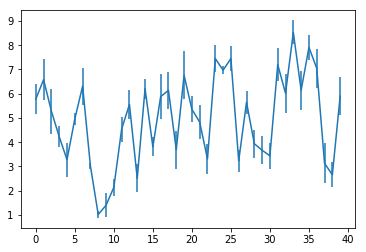

In [396]:
import matplotlib.pyplot as plt

t = list(zip(*mes))[0]
u = list(zip(*mes))[1]
plt.errorbar(range(len(t)), t, yerr=u)

In [ ]:
# This plot shows that with our fictitious cards-user model, for a given subset of flashcards,
# the order in which they are presented matters for the expected score.

# Before designing a federated learning model, we will do a centralised one. It will be train by reinforcement.

# The states will be given by the ordered subset of cards selected (randomly or not) to the user
# The actions will be the ordering in which the card will be presented for resolution
# The reward will be the score obtain by the user

# We will use an actor-critic policy:
# A critic deep learning model outputs the expected reward of a couple (state, action), meaning in this case
# (subset, permutation)

## 1. Define a critic to estimate rewards

In [4]:
import numpy as np
import torch as th
from torch import nn

import matplotlib.pyplot as plt


import torch.nn.functional as F

class Critic(nn.Module):
    '''
    in_state_size = dimension of the states (number of picked cards to order)
    in_action_size = dimension of the actions
    out_size = dimension of the output 
    All input sizes should be equal
    
    output : a float tensor giving the expected rewards
    '''
    
    def __init__(self, in_state_size, in_action_size, out_size = 1):
        super().__init__()
        # hidden layers
        self.hidden_state = nn.Linear(in_state_size, 32)
        self.hidden_action = nn.Linear(in_action_size, 32)
        self.hidden_state1 = nn.Linear(32, 64)
        self.hidden_state2 = nn.Linear(64, 64)
        self.hidden_action1 = nn.Linear(32, 64)
        self.hidden_action2 = nn.Linear(64, 64)
        self.hidden_sum1 = nn.Linear(64, 64)
        self.hidden_sum2 = nn.Linear(64, 64)
        self.hidden_sum3 = nn.Linear(64, 64)
        # Output layer
        self.output = nn.Linear(64, out_size)
        
    def forward(self, state, action):
        # Hidden layers with relu activation for states
        x = F.relu(self.hidden0_state(state))
        x = F.relu(self.hidden_state1(x))
        x = F.relu(self.hidden_state2(x))
        
        # Hidden layers with relu activation for action
        y = F.relu(self.hidden0_action(action))
        y = F.relu(self.hidden_action1(y))
        y = F.relu(self.hidden_action2(y))
        
        # sum channels
        
        z = x + y
        z = F.relu(self.hidden_sum1(z))
        z = F.relu(self.hidden_sum2(z))
        z = F.relu(self.hidden_sum3(z))
        # Output layer with softmax activation
        out = self.output(z)
        
        return out

In [5]:
my_critic = Critic(20, 20)

In [6]:
my_critic

Critic(
  (hidden_state): Linear(in_features=20, out_features=32, bias=True)
  (hidden_action): Linear(in_features=20, out_features=32, bias=True)
  (hidden_state1): Linear(in_features=32, out_features=64, bias=True)
  (hidden_state2): Linear(in_features=64, out_features=64, bias=True)
  (hidden_action1): Linear(in_features=32, out_features=64, bias=True)
  (hidden_action2): Linear(in_features=64, out_features=64, bias=True)
  (hidden_sum1): Linear(in_features=64, out_features=64, bias=True)
  (hidden_sum2): Linear(in_features=64, out_features=64, bias=True)
  (hidden_sum3): Linear(in_features=64, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=1, bias=True)
)

Parameter containing:
tensor([ 0.0062,  0.1158, -0.0756,  0.0720,  0.0878, -0.0658,  0.1082, -0.0838,
        -0.0678,  0.0500,  0.1026, -0.0198, -0.0858, -0.0622,  0.1080,  0.1144,
        -0.0310, -0.0193,  0.0903,  0.0797,  0.1169,  0.0676,  0.0374,  0.0822,
         0.1069,  0.0220,  0.0626, -0.0078, -0.1204, -0.0016,  0.0553, -0.1101,
        -0.0363,  0.0093,  0.0409,  0.1073, -0.0015,  0.0891, -0.0860, -0.1246,
         0.0768, -0.0043, -0.0464, -0.0169, -0.0556, -0.0385, -0.1081,  0.0928,
         0.0489,  0.0786, -0.0731, -0.0062,  0.0048, -0.0321,  0.0871,  0.0030,
        -0.1004, -0.1210,  0.1052,  0.0134, -0.0205, -0.0526,  0.1178, -0.0388],
       requires_grad=True)